In [2]:
'''----------------------------------- IMPORT PACKAGES ----------------------------------------------------'''
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [20]:
'''----------------------------------- PATHS ----------------------------------------------------'''
Figure_Name = "IOP1_Collocation_08_04_2021"
Data_file1 = "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Data/IOP1/SEOPC/SEOPC_08_03_2021_1651UTC.csv"
Data_file2 = "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Data/IOP1/SWOPC/SWOPC_08_03_2021_1716UTC.csv"
'''----------------------------------- Load Data ----------------------------------------------------'''
df1 = pd.read_csv(Data_file1,skiprows=13)
df2 = pd.read_csv(Data_file2,skiprows=13)
'''----------------------------------- Convert Excel Time ----------------------------------------------------'''
#date function converter
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

df1['Time'] = pd.to_datetime(df1['OADateTime'].apply(read_date), errors='coerce')
df2['Time'] = pd.to_datetime(df2['OADateTime'].apply(read_date), errors='coerce')
df1 = df1.set_index('Time')
df2 = df2.set_index('Time')
df1 = df1.loc['2021-08-04 01:00:00':'2021-08-04 16:00:00']
df2 = df2.loc['2021-08-04 00:00:00':'2021-08-04 15:00:00']
df2.index = df2.index+ pd.Timedelta(hours=1) #Correct time offset for SWOPC

<ipython-input-20-17d2bd07d19e>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2 = df2.loc['2021-08-04 00:00:00':'2021-08-04 15:00:00']


In [5]:
'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 16}) #Set font size

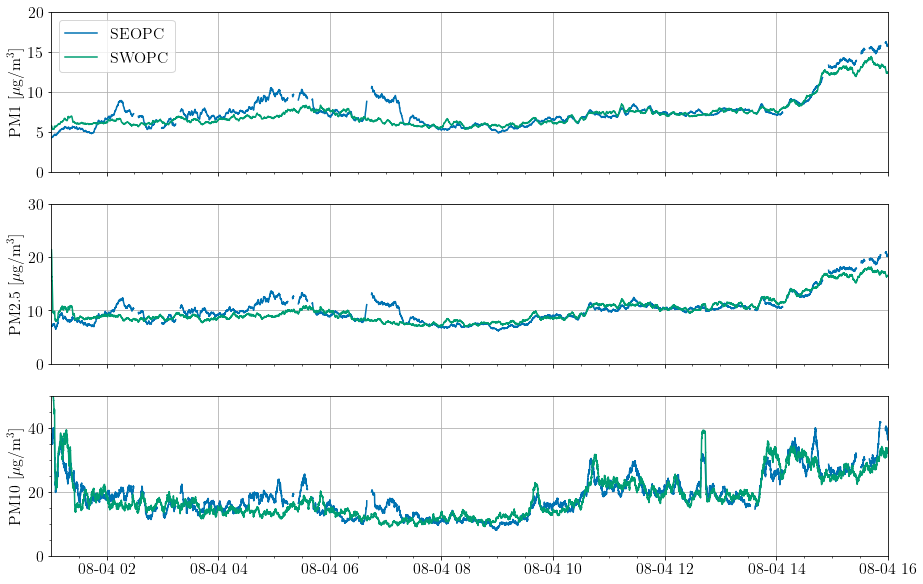

In [21]:
'''---------------------------------------------- FIGURE 1 ------------------------------------------------------'''
ymax = 1500
#Figure 1 ~ PM1, PM2.5, and PM10
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 10))

ax1.plot(df1.index, df1['RollMean_PM1'])
ax1.plot(df2.index, df2['RollMean_PM1'])
ax1.set(ylabel = r'PM1 [$\mu$g/m$^3$]')
ax1.grid(b=bool, which='major', axis='both')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylim(0, 20)
ax1.legend(['SEOPC','SWOPC'])

ax2.plot(df1.index, df1['RollMean_PM2.5'])
ax2.plot(df2.index, df2['RollMean_PM2.5'])
ax2.set(ylabel = r'PM2.5 [$\mu$g/m$^3$]')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylim(0, 30)

ax3.plot(df1.index, df1['RollMean_PM10'])
ax3.plot(df2.index, df2['RollMean_PM10'])
ax3.set(ylabel = r'PM10 [$\mu$g/m$^3$]')
ax3.grid(b=bool, which='major', axis='both')
ax3.autoscale(enable=True, axis='x', tight=True)
ax3.set_ylim(0, 50)

plt.minorticks_on()
#save figure
plt.savefig('../gen/' + Figure_Name +'.png', bbox_inches='tight')